In [ ]:
#importing the required libraries & packages
import numpy as np 
import pandas as pd 
import statsmodels.api 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score,StratifiedKFold,learning_curve
from sklearn.metrics import classification_report,f1_score, recall_score, precision_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
%matplotlib inline


In [ ]:
#importing the dataset
import pandas as pd
from google.colab import files
file = files.upload()
telecom_data = pd.read_csv("telecom_customer_churn.csv") 

Saving telecom_customer_churn.csv to telecom_customer_churn.csv


In [ ]:
#filtering out the 'Joined' category from the target variable since it does not hold much importance
#we are only interested to know if the customer is staying or leaving the company
telecom_data = telecom_data.loc[telecom_data['Customer Status'] != 'Joined' ]
telecom_data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
#checking the updated categories in the target variable
a = telecom_data['Customer Status'].unique()
print(sorted(a))

['Churned', 'Stayed']


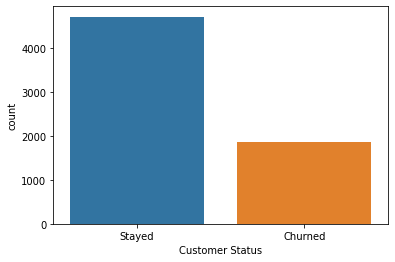

In [ ]:
#checking the distribution of categories in target variable
import seaborn as sns
sns.countplot(x=telecom_data["Customer Status"])

In [ ]:
#checking the general information of the dataframe
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6589 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6589 non-null   object 
 1   Gender                             6589 non-null   object 
 2   Age                                6589 non-null   int64  
 3   Married                            6589 non-null   object 
 4   Number of Dependents               6589 non-null   int64  
 5   City                               6589 non-null   object 
 6   Zip Code                           6589 non-null   int64  
 7   Latitude                           6589 non-null   float64
 8   Longitude                          6589 non-null   float64
 9   Number of Referrals                6589 non-null   int64  
 10  Tenure in Months                   6589 non-null   int64  
 11  Offer                              6589 non-null   objec

In [ ]:
#removing the specified columns since they have too many missing values
telecom_data = telecom_data.drop(['Churn Category','Churn Reason','Customer ID'],axis=1)

In [ ]:
#checking the updated dataframe
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6589 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6589 non-null   object 
 1   Age                                6589 non-null   int64  
 2   Married                            6589 non-null   object 
 3   Number of Dependents               6589 non-null   int64  
 4   City                               6589 non-null   object 
 5   Zip Code                           6589 non-null   int64  
 6   Latitude                           6589 non-null   float64
 7   Longitude                          6589 non-null   float64
 8   Number of Referrals                6589 non-null   int64  
 9   Tenure in Months                   6589 non-null   int64  
 10  Offer                              6589 non-null   object 
 11  Phone Service                      6589 non-null   objec

In [ ]:
#converting the zip code column to object data type
telecom_data['Zip Code']=telecom_data['Zip Code'].astype('object')

In [ ]:
#adding all the numeric columns to a new dataframe 
telecom_data_num = telecom_data.select_dtypes('number')

#adding all the object datatype columns to a new dataframe 
telecom_data_obj = telecom_data.select_dtypes('object')

In [ ]:
#checking the general information of the numeric columns dataframe
telecom_data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6589 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6589 non-null   int64  
 1   Number of Dependents               6589 non-null   int64  
 2   Latitude                           6589 non-null   float64
 3   Longitude                          6589 non-null   float64
 4   Number of Referrals                6589 non-null   int64  
 5   Tenure in Months                   6589 non-null   int64  
 6   Avg Monthly Long Distance Charges  5945 non-null   float64
 7   Avg Monthly GB Download            5245 non-null   float64
 8   Monthly Charge                     6589 non-null   float64
 9   Total Charges                      6589 non-null   float64
 10  Total Refunds                      6589 non-null   float64
 11  Total Extra Data Charges           6589 non-null   int64

In [ ]:
#checking the general stats of the df 
telecom_data_num.describe()

,Age,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,5945.000000,5245.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000
mean,46.760510,0.476097,36.199761,-119.757670,2.020944,34.499772,25.496246,26.225929,65.030695,2432.042243,2.080938,7.169525,798.087251,3235.218082
std,16.841362,0.968499,2.472459,2.155696,3.024016,23.968734,14.198424,19.565724,31.100727,2265.500080,8.125054,25.803163,853.767972,2854.600036
min,19.000000,0.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,0.000000,33.989524,-121.788090,0.000000,12.000000,13.140000,13.000000,35.800000,544.550000,0.000000,0.000000,106.680000,835.450000
50%,46.000000,0.000000,36.245926,-119.601370,0.000000,32.000000,25.720000,21.000000,71.050000,1563.900000,0.000000,0.000000,472.680000,2376.450000
75%,60.000000,0.000000,38.169605,-117.967399,3.000000,57.000000,37.690000,30.000000,90.400000,4003.000000,0.000000,0.000000,1275.120000,5106.640000
max,80.000000,9.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


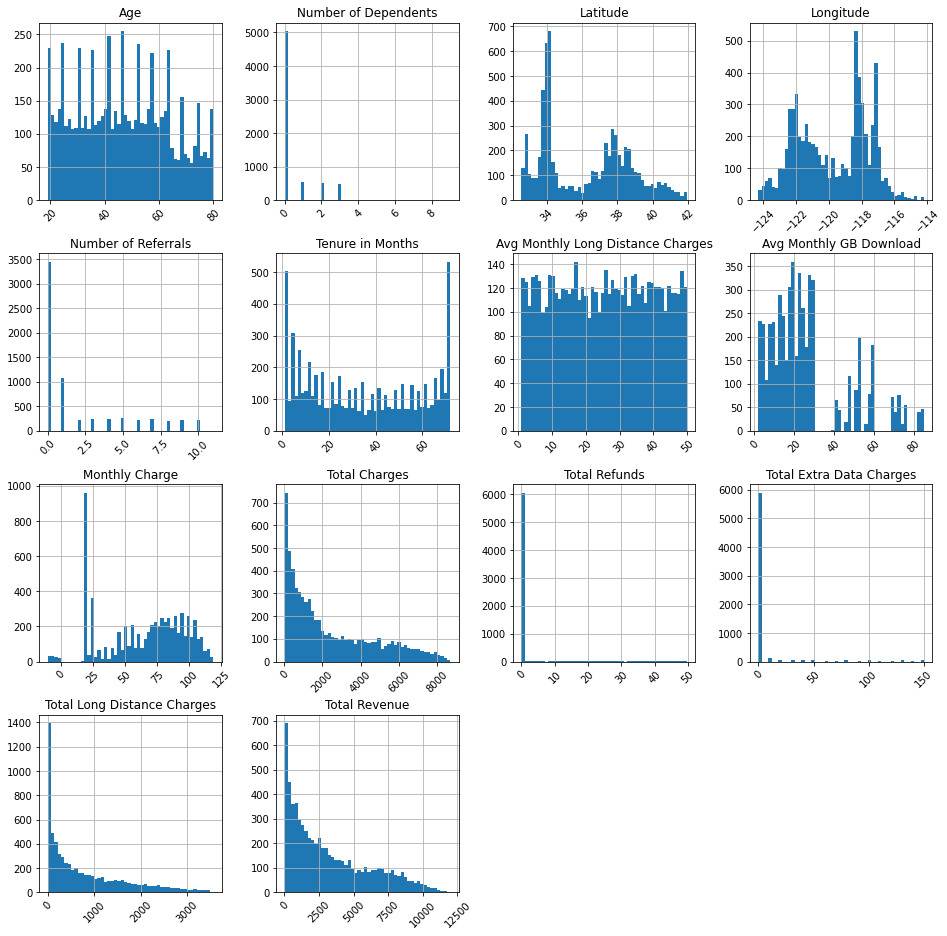

In [ ]:
#plotting histogram for numerical data
telecom_data_num.hist(figsize=(16,16), xrot=45, bins = 50);

In [ ]:
#checking the general information of the object datatype columns dataframe
telecom_data_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6589 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  6589 non-null   object
 1   Married                 6589 non-null   object
 2   City                    6589 non-null   object
 3   Zip Code                6589 non-null   object
 4   Offer                   6589 non-null   object
 5   Phone Service           6589 non-null   object
 6   Multiple Lines          5945 non-null   object
 7   Internet Service        6589 non-null   object
 8   Internet Type           5245 non-null   object
 9   Online Security         5245 non-null   object
 10  Online Backup           5245 non-null   object
 11  Device Protection Plan  5245 non-null   object
 12  Premium Tech Support    5245 non-null   object
 13  Streaming TV            5245 non-null   object
 14  Streaming Movies        5245 non-null   object
 15  Stre

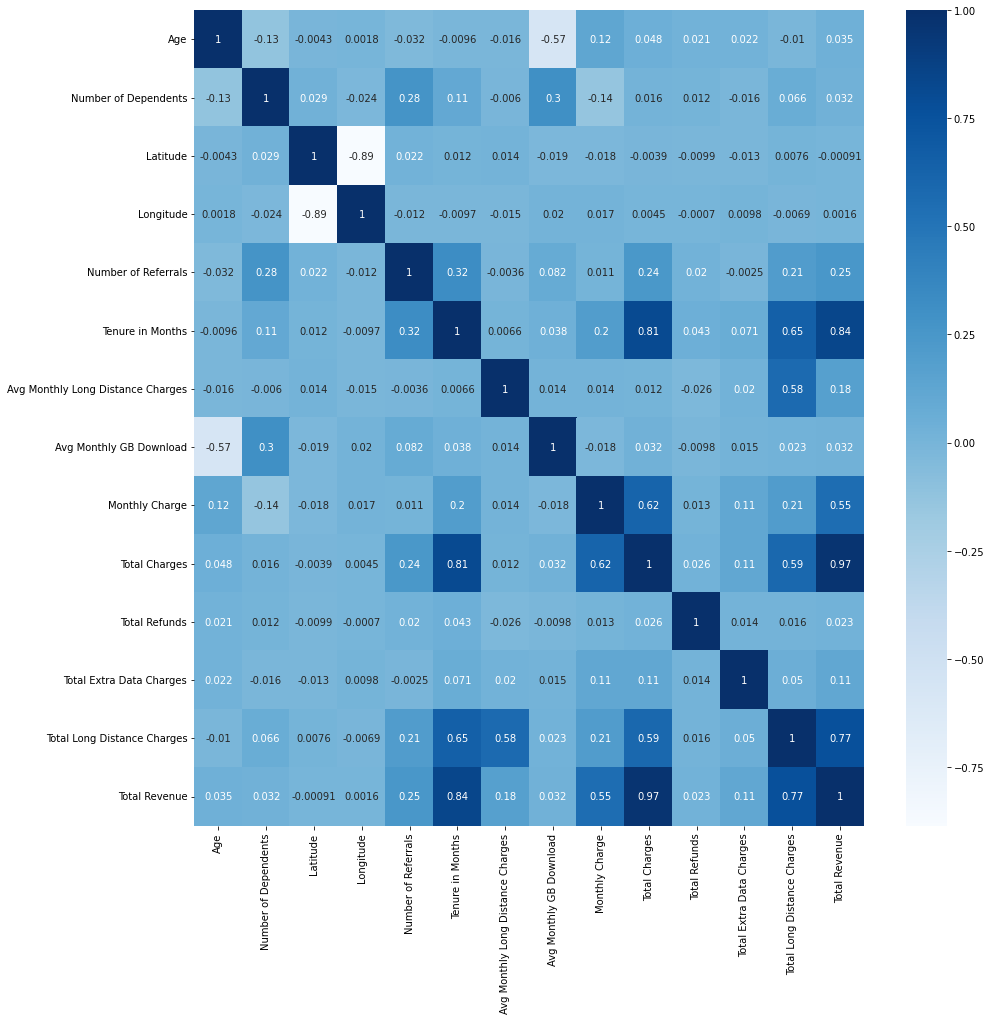

In [ ]:
#plotting a correlation heatmap to check the strength of the relationship between the variables

corr_heatmap = telecom_data.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(15, 15))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# plotting the heatmap
sns.heatmap(corr_heatmap, cmap="Blues", annot=True)

Based on the correlation maps we can drop Total Charges and Total Long Distance Charges being highly correlated with Total Revenue

In [ ]:
print('Number of unique values for Longitude : %i'% telecom_data['Longitude'].nunique())
print('Number of unique values for Latitude: %i'% telecom_data['Longitude'].nunique())


Number of unique values for Longitude : 1625
Number of unique values for Latitude: 1625


In [ ]:
#dropping total charges,Total Long Distance Charges as both the explanatory variables have high correlation
#and this can make the model unstable 
#also dropping longitude  & latitude as they have low number of unique values to be useful for analysis
telecom_data_num = telecom_data_num.drop(['Total Charges','Total Long Distance Charges','Longitude','Latitude'],axis=1)

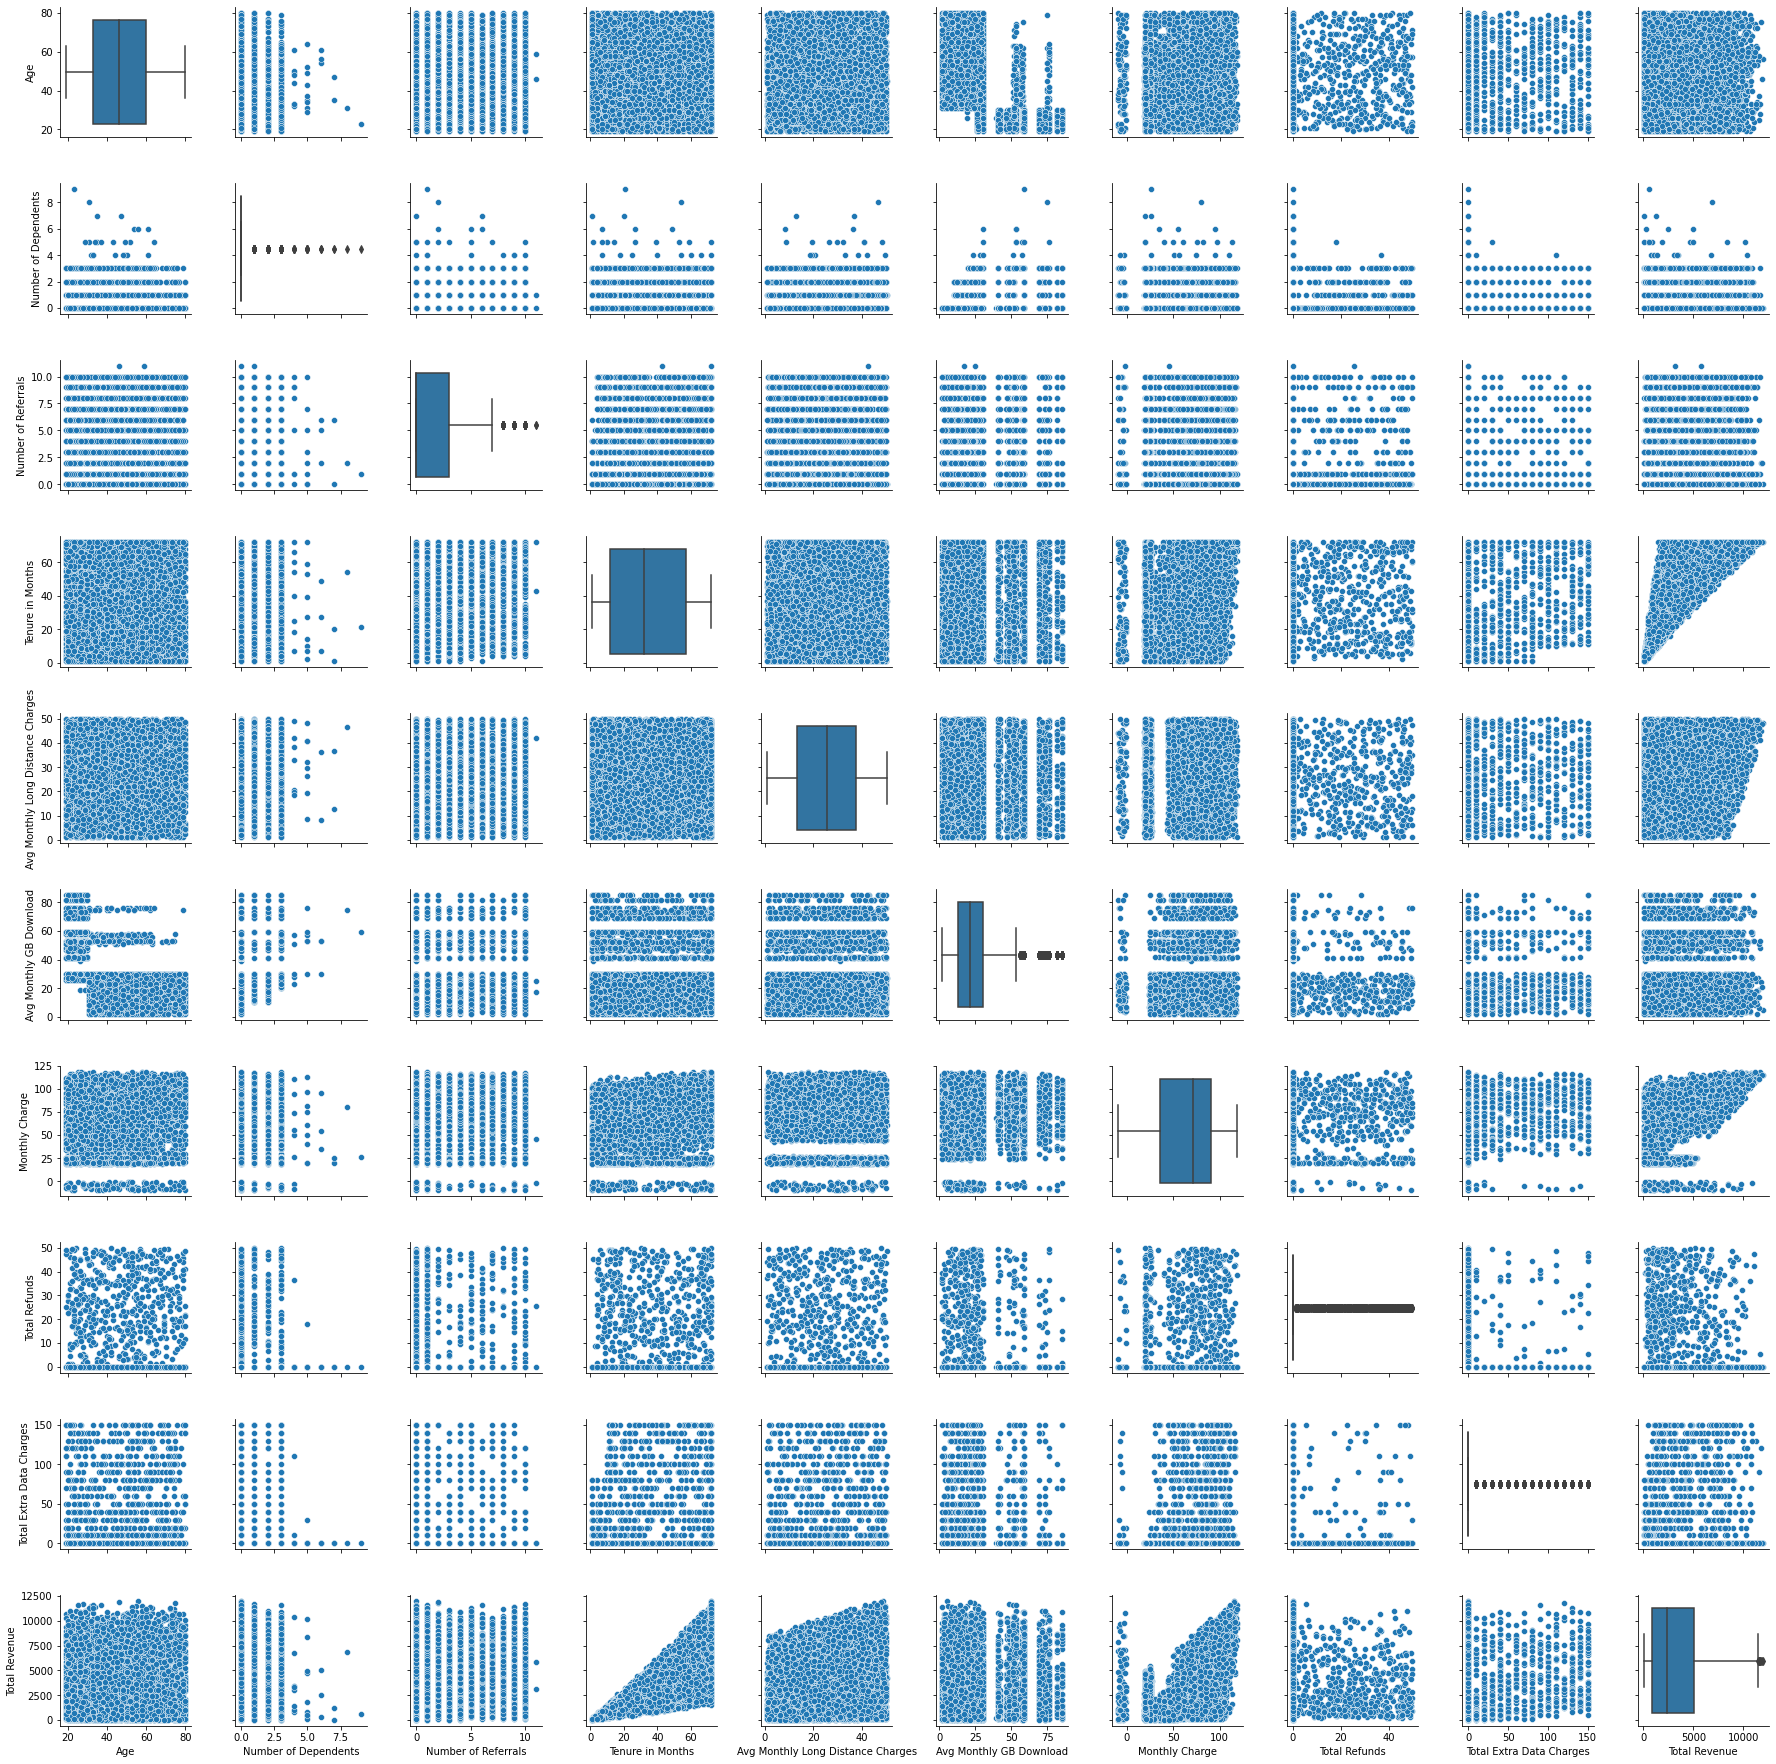

In [ ]:
#plotting a pairplot for num df
pair_plot = sns.PairGrid(telecom_data_num);
pair_plot.map_diag(sns.boxplot)
pair_plot.map_offdiag(sns.scatterplot)

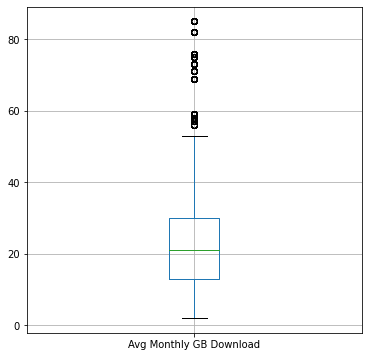

In [ ]:
#boxplot to check the average download of data in gigabytes(GB)
telecom_data_num[['Avg Monthly GB Download']].boxplot(figsize=(6,6))

<ipython-input-23-d7d0ddb5fed0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_data_obj['AgeRange'] = pd.cut(telecom_data['Age'],age_buckets, labels=agegroups,include_lowest=True)


<Figure size 720x576 with 0 Axes>

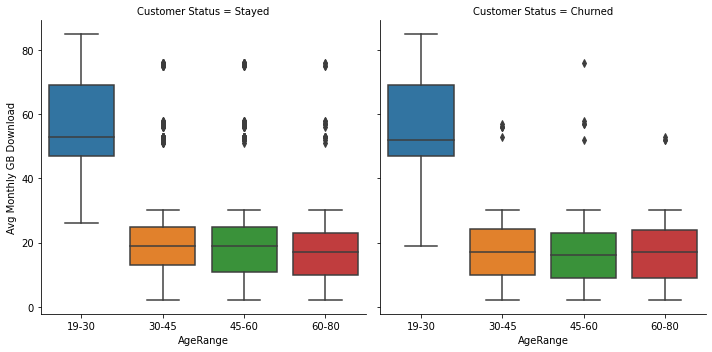

In [ ]:
#analysis for reasons behind high downloads based on the outliers in the boxplot
#binning the data in buckets to see the distribution of average download of data in gigabytes(GB) grouped by age
age_buckets = [19,30,45,60,80]
agegroups = ['19-30','30-45','45-60','60-80']
telecom_data_obj['AgeRange'] = pd.cut(telecom_data['Age'],age_buckets, labels=agegroups,include_lowest=True)

plt.figure(figsize=(10,8))
sns.catplot(data=telecom_data_obj.join(telecom_data_num),x='AgeRange',y='Avg Monthly GB Download', col ='Customer Status',kind='box')

Going by the general trend, customers of age groups 19-30 download the most data in gigabytes(GB) on a monthly basis. 

In [ ]:
# populating Unique values for below columns 
pd.concat([telecom_data['Total Extra Data Charges'].value_counts(normalize=True).reset_index(),
           telecom_data['Number of Dependents'].value_counts(normalize=True).reset_index(),
          telecom_data['Total Refunds'].value_counts(normalize=True).reset_index(),
           telecom_data['Number of Referrals'].value_counts(normalize=True).reset_index()],axis=1).rename(columns={'index':'value'})

,value,Total Extra Data Charges,value,Number of Dependents,value,Total Refunds,value,Number of Referrals
0,0.0,0.896191,0.0,0.765215,0.00,0.921081,0.0,0.523296
1,10.0,0.017150,1.0,0.079830,46.07,0.000304,1.0,0.162544
2,40.0,0.009258,2.0,0.076795,8.74,0.000304,5.0,0.038701
3,30.0,0.007892,3.0,0.074518,1.31,0.000304,3.0,0.037487
4,20.0,0.007285,5.0,0.001366,5.73,0.000304,7.0,0.036880
...,...,...,...,...,...,...,...,...
491,NaN,NaN,NaN,NaN,44.81,0.000152,NaN,NaN
492,NaN,NaN,NaN,NaN,12.59,0.000152,NaN,NaN
493,NaN,NaN,NaN,NaN,31.90,0.000152,NaN,NaN
494,NaN,NaN,NaN,NaN,12.07,0.000152,NaN,NaN


The above columns: Total Extra Data Charges, Number of Dependents, Total Refunds, Number of Referrals are mostly populated by 0 values. So they can be transformed into binary categorical values

In [ ]:
#transforming below columns to binary categorical &  adding them to telecom_data_obj df from the original df
telecom_data_obj.loc[:,'Refunds_cat'] = np.where(telecom_data['Total Refunds'] == 0,'NO','YES')
telecom_data_obj.loc[:,'Dependents_cat'] = np.where(telecom_data['Number of Dependents'] == 0,'NO','YES')
telecom_data_obj.loc[:,'Extra_Data_Charges_cat'] = np.where(telecom_data['Total Extra Data Charges'] == 0,'NO','YES')
telecom_data_obj.loc[:,'Referrals_cat'] = np.where(telecom_data['Number of Referrals'] == 0, 'NO', 'Yes')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
#checking the updated df
telecom_data_obj.columns

Index(['Gender', 'Married', 'City', 'Zip Code', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Customer Status', 'AgeRange', 'Refunds_cat',
       'Dependents_cat', 'Extra_Data_Charges_cat', 'Referrals_cat'],
      dtype='object')

Numeric features vs target (Customer Status)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


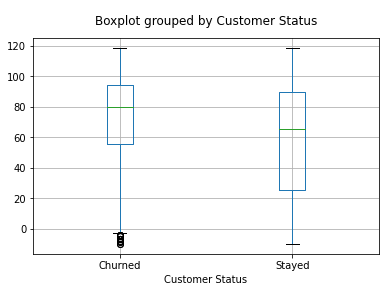

In [ ]:
#plotting box plot for some of the numeric features against the target variable 
telecom_data_num.join(telecom_data['Customer Status']).boxplot(['Monthly Charge'],'Customer Status')
plt.title(label = '\n')
plt.show();

* From the above box plot, it can be inferred that customers who have left the company have higher monthly average charges. 

<Figure size 864x720 with 0 Axes>

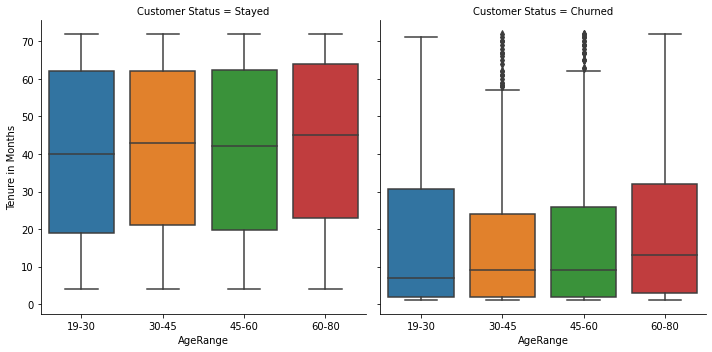

In [ ]:
plt.figure(figsize=(12,10))
sns.catplot(data=telecom_data_obj.join(telecom_data_num),x='AgeRange',y='Tenure in Months',kind='box',col='Customer Status')

* From the above box plot, it can be inferred that customers tend to remain loyal to the company approximately after 30 months 

In [ ]:
#creating a binary variable to check if customer is loyal after 30 months of tenure
telecom_data_obj.loc[:,'is_loyal'] = np.where(telecom_data['Tenure in Months'] >= 30, 'Yes','No')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
#checking the newly added column
telecom_data_obj.columns

Index(['Gender', 'Married', 'City', 'Zip Code', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Customer Status', 'AgeRange', 'Refunds_cat',
       'Dependents_cat', 'Extra_Data_Charges_cat', 'Referrals_cat',
       'is_loyal'],
      dtype='object')

In [ ]:
#dropping city and zipcode columns as they have very less number of unique values 
telecom_data_obj = telecom_data_obj.drop(['City','Zip Code'],axis=1)

In [ ]:
telecom_data_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6589 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  6589 non-null   object  
 1   Married                 6589 non-null   object  
 2   Offer                   6589 non-null   object  
 3   Phone Service           6589 non-null   object  
 4   Multiple Lines          5945 non-null   object  
 5   Internet Service        6589 non-null   object  
 6   Internet Type           5245 non-null   object  
 7   Online Security         5245 non-null   object  
 8   Online Backup           5245 non-null   object  
 9   Device Protection Plan  5245 non-null   object  
 10  Premium Tech Support    5245 non-null   object  
 11  Streaming TV            5245 non-null   object  
 12  Streaming Movies        5245 non-null   object  
 13  Streaming Music         5245 non-null   object  
 14  Unlimited Data          

* The variables Internet Type, Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming, Unlimited Data, Avg Monthly GB Download have the same count of Nan values. All these columns in general are attributed to an internet connection. 
* As per the data description, these are not Nan values, but they actually signify that the customer has not subscribed to the internet service of the telecom company. 

In [ ]:
telecom_data_obj['Internet Service'].value_counts()

Yes    5245
No     1344
Name: Internet Service, dtype: int64

In [ ]:
telecom_data_obj.join(telecom_data_num)[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data','Avg Monthly GB Download']].isna().sum()

Internet Type              1344
Online Security            1344
Online Backup              1344
Device Protection Plan     1344
Premium Tech Support       1344
Streaming TV               1344
Streaming Movies           1344
Streaming Music            1344
Unlimited Data             1344
Avg Monthly GB Download    1344
dtype: int64

* The count of Nan values is equal to the 'No' values of the internet service column. 
* Through this, we can confirm that the Nan values are not missing values. 

In [ ]:
#for the below columns, we are replacing nan values with the value 'No internet'
telecom_data_obj[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']] = telecom_data_obj[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']].replace(np.nan,'No Internet')

#replacing nan values for Avg Monthly GB Download with 0           
telecom_data_num['Avg Monthly GB Download'] = telecom_data_num['Avg Monthly GB Download'].replace(np.nan,0.0)

checking values with data associated to variable 'multiple lines' 

In [ ]:
telecom_data_obj['Phone Service'].value_counts()

Yes    5945
No      644
Name: Phone Service, dtype: int64

In [ ]:
telecom_data_obj['Multiple Lines'].isna().sum()

644

No value for phone service = sum of null values for multiple lines 

In [ ]:
telecom_data_num['Avg Monthly Long Distance Charges'].isna().sum()

644

In [ ]:
telecom_data_obj[telecom_data_obj['Multiple Lines'].isna()].head()

,Gender,Married,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,...,Contract,Paperless Billing,Payment Method,Customer Status,AgeRange,Refunds_cat,Dependents_cat,Extra_Data_Charges_cat,Referrals_cat,is_loyal
10,Male,No,None,No,NaN,Yes,Cable,Yes,No,No,...,Two Year,No,Credit Card,Stayed,45-60,NO,NO,NO,NO,Yes
14,Female,No,None,No,NaN,Yes,DSL,Yes,Yes,Yes,...,Two Year,No,Bank Withdrawal,Stayed,30-45,NO,NO,NO,NO,Yes
16,Female,Yes,None,No,NaN,Yes,DSL,Yes,No,Yes,...,One Year,No,Credit Card,Stayed,45-60,NO,YES,NO,NO,Yes
19,Male,No,None,No,NaN,Yes,Cable,No,No,No,...,Month-to-Month,Yes,Bank Withdrawal,Churned,60-80,NO,NO,NO,NO,No
25,Female,Yes,None,No,NaN,Yes,DSL,Yes,No,No,...,Month-to-Month,No,Bank Withdrawal,Churned,30-45,NO,YES,NO,Yes,No


* Similar to the case mentioned above, the Nan values for the feature 'Multiple lines' means that there is no subscription to phone service by the customer. 

In [ ]:
#for the below columns we are replacing null values with the value 'No phone service'
telecom_data_obj['Multiple Lines'] = telecom_data_obj['Multiple Lines'].replace(np.nan,'NO phone Service')
telecom_data_num['Avg Monthly Long Distance Charges'] = telecom_data_num['Avg Monthly Long Distance Charges'].replace(np.nan,'NO phone Service')
telecom_data_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6589 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  6589 non-null   object  
 1   Married                 6589 non-null   object  
 2   Offer                   6589 non-null   object  
 3   Phone Service           6589 non-null   object  
 4   Multiple Lines          6589 non-null   object  
 5   Internet Service        6589 non-null   object  
 6   Internet Type           6589 non-null   object  
 7   Online Security         6589 non-null   object  
 8   Online Backup           6589 non-null   object  
 9   Device Protection Plan  6589 non-null   object  
 10  Premium Tech Support    6589 non-null   object  
 11  Streaming TV            6589 non-null   object  
 12  Streaming Movies        6589 non-null   object  
 13  Streaming Music         6589 non-null   object  
 14  Unlimited Data          

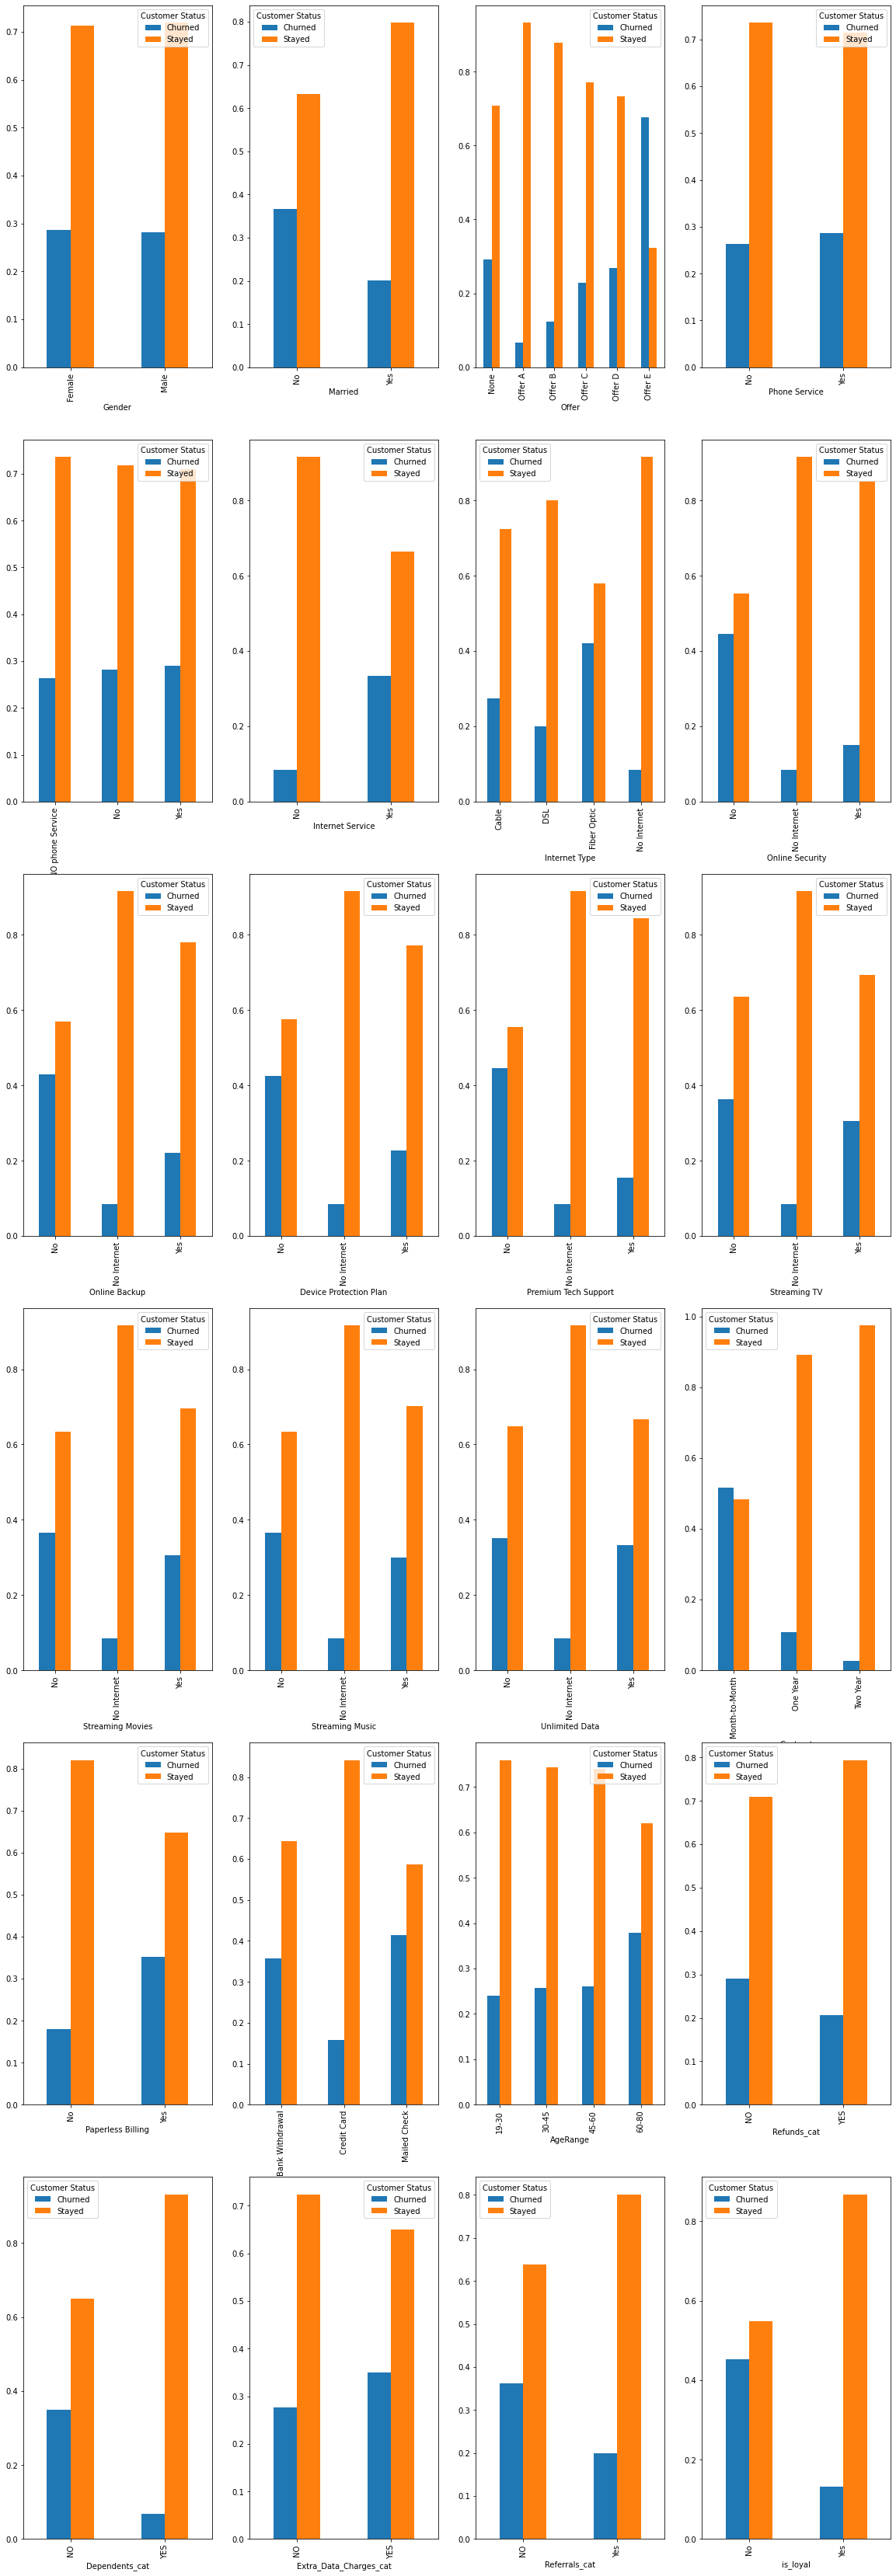

In [ ]:
#checking the relation between customer status column and the columns of telecom_data_obj
i=0
fig,axes=plt.subplots(6,4,figsize=(20,60))
for col in telecom_data_obj.columns:
    if col != 'Customer Status':
        pd.crosstab(telecom_data_obj[col],telecom_data_obj['Customer Status'],normalize='index').plot(kind='bar', ax=axes.flat[i])
        i+=1

Insights: 

* Married Customers are more loyal to the telecom company
* Customers subscribed to  offer "E" are more likely to leave
* People subscribed to internet service are less likely to churn compared to people who do not have it
* Customers not subscribed to amenties such as online security, online Backup, Device Protection Plan and Premium Tech Support are more likely to leave
* People without dependents are more likely to churn as compared to those who have

In [ ]:
#analysing how customer status is distributed based on monthly charge variable
bin = [0,30,70,90,119]
m_c = ['0-30','30-70','70-90','90-119']
telecom_data_obj['Charges'] = pd.cut(telecom_data['Monthly Charge'],bin, labels=m_c,include_lowest=True)
telecom_data_obj.columns

Index(['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Customer Status', 'AgeRange',
       'Refunds_cat', 'Dependents_cat', 'Extra_Data_Charges_cat',
       'Referrals_cat', 'is_loyal', 'Charges'],
      dtype='object')

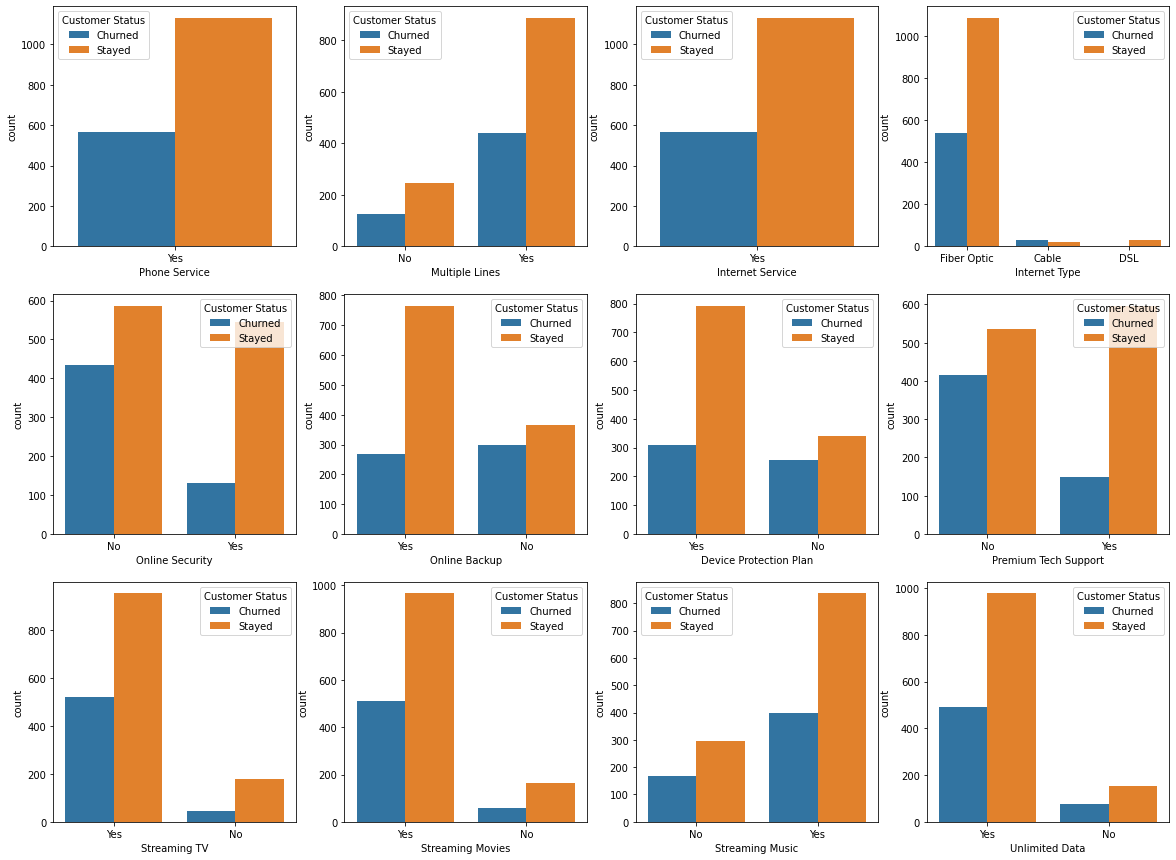

In [ ]:
#plotting the graphs
fig, axes = plt.subplots(3,4,figsize=(20,15))
for i,col in enumerate(['Phone Service','Multiple Lines','Internet Service','Internet Type','Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data']):
    sns.countplot(data=telecom_data_obj[telecom_data_obj['Charges'] == '90-119'],x=col,ax=axes.flat[i],hue='Customer Status')

Insights
* Customers who pay high monthly charges without having subscribed to additional services in their plan such as Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV are prone to churn

Logistic Regression

In [ ]:
#checking the df info
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6475 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6475 non-null   object 
 1   Age                                6475 non-null   int64  
 2   Married                            6475 non-null   object 
 3   Number of Dependents               6475 non-null   int64  
 4   Number of Referrals                6475 non-null   int64  
 5   Tenure in Months                   6475 non-null   int64  
 6   Offer                              6475 non-null   object 
 7   Phone Service                      6475 non-null   object 
 8   Avg Monthly Long Distance Charges  5842 non-null   float64
 9   Multiple Lines                     5842 non-null   object 
 10  Internet Service                   6475 non-null   object 
 11  Internet Type                      5155 non-null   objec

In [ ]:
#replacing the Nan values 
telecom_data[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']] = telecom_data[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']].replace(np.nan,'No Internet')
telecom_data['Avg Monthly GB Download'] = telecom_data['Avg Monthly GB Download'].replace(np.nan,0.0)
telecom_data['Multiple Lines'] = telecom_data['Multiple Lines'].replace(np.nan,'NO phone Service')
telecom_data['Avg Monthly Long Distance Charges'] = telecom_data['Avg Monthly Long Distance Charges'].replace(np.nan,0.0)

In [ ]:
#here it can be observed that some values of Monthly charge have negative amounts
#these can be considered as erronous values since the amount that a customer pays to a company cannot be negative
telecom_data[telecom_data['Monthly Charge'] <= 0][['Monthly Charge','Total Revenue','Total Charges','Total Refunds','Total Extra Data Charges','Customer Status']]

,Monthly Charge,Total Revenue,Total Charges,Total Refunds,Total Extra Data Charges,Customer Status


In [ ]:
#filtering the df with only positive values of monthly charge
telecom_data = telecom_data[telecom_data['Monthly Charge'] >= 0]

In [ ]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6475 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6475 non-null   object 
 1   Age                                6475 non-null   int64  
 2   Married                            6475 non-null   object 
 3   Number of Dependents               6475 non-null   int64  
 4   Number of Referrals                6475 non-null   int64  
 5   Tenure in Months                   6475 non-null   int64  
 6   Offer                              6475 non-null   object 
 7   Phone Service                      6475 non-null   object 
 8   Avg Monthly Long Distance Charges  6475 non-null   float64
 9   Multiple Lines                     6475 non-null   object 
 10  Internet Service                   6475 non-null   object 
 11  Internet Type                      6475 non-null   objec

data set splitting 80:20 ratio

In [ ]:
#splitting the df in 80:20 ratio of train:test data
X = telecom_data.drop('Customer Status',axis=1)
y = telecom_data['Customer Status']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=300) 


In [ ]:
#checking the different types of values for each nominal column 
pd.Series({h: telecom_data.select_dtypes('object')[h].unique() for h in telecom_data.select_dtypes('object')})

Gender                                                       [Female, Male]
Married                                                           [Yes, No]
Offer                     [None, Offer E, Offer D, Offer A, Offer B, Off...
Phone Service                                                     [Yes, No]
Multiple Lines                                  [No, Yes, NO phone Service]
Internet Service                                                  [Yes, No]
Internet Type                        [Cable, Fiber Optic, DSL, No Internet]
Online Security                                      [No, Yes, No Internet]
Online Backup                                        [Yes, No, No Internet]
Device Protection Plan                               [No, Yes, No Internet]
Premium Tech Support                                 [Yes, No, No Internet]
Streaming TV                                         [Yes, No, No Internet]
Streaming Movies                                     [No, Yes, No Internet]
Streaming Mu

* From the above data we can observe that Internet Type column has ordinal values which have an order. 
* The order being Fibre optic is better than cable and cable is better than Digital Subscriber Line(DSL)

In [ ]:
#using Label encoder to encode the Internet Type Variable ---
ordinal_enco = LabelEncoder()
X_train['Internet Type'] = ordinal_enco.fit_transform(X_train['Internet Type'])
X_test['Internet Type'] = ordinal_enco.transform(X_test['Internet Type'])

In [ ]:
#--- Standardizing numeric columns ---
number_columns = X_train.select_dtypes('number').columns
std_scaler = StandardScaler()
X_train[number_columns] = std_scaler.fit_transform(X_train[number_columns])
X_test[number_columns] = std_scaler.transform(X_test[number_columns])

In [ ]:
X_train[number_columns]

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Internet Type,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
3275,1.550208,-0.494918,-0.670234,-0.982717,-1.290732,-0.796651,-0.870979,-0.353970,-0.816472,1.610705,-0.279634,-0.894154,-0.921614
2,0.184246,-0.494918,-0.670234,-1.274829,0.703672,0.293038,0.452897,0.258153,-0.949405,-0.253850,-0.279634,-0.772939,-0.985121
2017,-0.350261,-0.494918,-0.670234,0.060541,-1.472453,-1.886339,-0.920011,-1.048043,-0.512268,-0.253850,-0.279634,-0.930288,-0.686370
1790,-1.300496,-0.494918,-0.670234,-1.274829,-0.074301,0.293038,1.874837,0.495643,-0.922814,-0.253850,1.641966,-0.829192,-0.963416
4524,-1.419275,-0.494918,0.324840,0.477844,1.548254,-1.886339,0.992253,-0.017804,0.276582,-0.253850,-0.279634,1.581518,0.691584
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348,-0.825379,-0.494918,-0.670234,-1.233098,0.778042,1.382726,-1.018076,-1.546438,-1.025301,-0.253850,-0.279634,-0.726880,-1.031367
300,1.015701,-0.494918,-0.670234,0.394384,-0.281243,-0.796651,0.060637,-0.536269,-0.125854,-0.253850,-0.279634,0.017172,-0.096278
6780,-0.587820,-0.494918,-0.670234,-0.899256,-1.224122,0.293038,-0.821946,0.500661,-0.651828,-0.253850,-0.279634,-0.871931,-0.779312
2994,-0.825379,-0.494918,-0.338543,-1.316559,1.325792,0.293038,-0.184525,0.450487,-0.962302,-0.253850,-0.279634,-0.778538,-0.997007


In [ ]:
#One hot encoding nominal features

oh_col = X.select_dtypes('object').drop('Internet Type',axis=1).columns #object columns to be one hot encoded 

encoder_onehot = OneHotEncoder(sparse=False)
OH_encoded_train_features = encoder_onehot.fit_transform(X_train[oh_col])
OH_encoded_X_train = pd.DataFrame(data=OH_encoded_train_features,index=X_train[oh_col].index,
                                  columns=encoder_onehot.get_feature_names(X_train[oh_col].columns))

OH_encoded_test_features = encoder_onehot.transform(X_test[oh_col])
OH_encoded_X_test = pd.DataFrame(data=OH_encoded_test_features,index=X_test[oh_col].index,
                                 columns=encoder_onehot.get_feature_names(X_test[oh_col].columns))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train = pd.concat([X_train,OH_encoded_X_train],axis=1)
X_train = X_train.drop(X_train[oh_col],axis=1)
X_test = pd.concat([X_test,OH_encoded_X_test],axis=1)
X_test = X_test.drop(X_test[oh_col],axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5180 entries, 3055 to 5956
Data columns (total 76 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 5180 non-null   float64
 1   Number of Dependents                5180 non-null   float64
 2   Number of Referrals                 5180 non-null   float64
 3   Tenure in Months                    5180 non-null   float64
 4   Avg Monthly Long Distance Charges   5180 non-null   float64
 5   Internet Type                       5180 non-null   float64
 6   Avg Monthly GB Download             5180 non-null   float64
 7   Monthly Charge                      5180 non-null   float64
 8   Total Charges                       5180 non-null   float64
 9   Total Refunds                       5180 non-null   float64
 10  Total Extra Data Charges            5180 non-null   float64
 11  Total Long Distance Charges         5180

In [ ]:
# creating a dictionary to save performance metrics of each model 

f1_churned = {}
f1_stayed = {}
precision_churned = {}
precision_stayed = {}
recall_churned = {}
recall_stayed = {}

In [ ]:
#Fitting the model
lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train,y_train)
y_pred = lgr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Churned       0.77      0.78      0.77       368
      Stayed       0.91      0.91      0.91       927

    accuracy                           0.87      1295
   macro avg       0.84      0.84      0.84      1295
weighted avg       0.87      0.87      0.87      1295



In [ ]:
f1_churned['LogReg'] = f1_score(y_test,y_pred,average=None).round(2)[0]
f1_stayed['LogReg'] = f1_score(y_test,y_pred,average=None).round(2)[1]

precision_churned['LogReg'] = precision_score(y_test,y_pred,average=None).round(2)[0]
precision_stayed['LogReg'] = precision_score(y_test,y_pred,average=None).round(2)[1]

recall_churned['LogReg'] = recall_score(y_test,y_pred,average=None).round(2)[0]
recall_stayed['LogReg'] = recall_score(y_test,y_pred,average=None).round(2)[1]

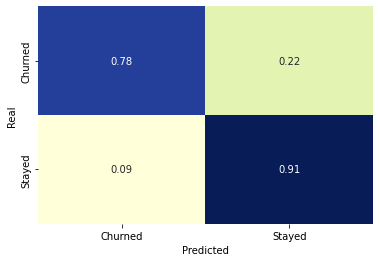

In [ ]:
#plotting confusion matrix
conf_matrix = pd.crosstab(y_test,y_pred,rownames=['Real'],colnames=['Predicted'],normalize='index')
sns.heatmap(conf_matrix,fmt='.2f',annot=True,cmap="YlGnBu", cbar=False)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


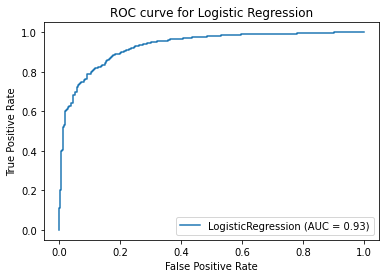

In [ ]:
#plotting the ROC curve
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection
metrics.plot_roc_curve(lgr, X_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression')
plt.show()

In [ ]:
#Defining a function to retrieve the engineered dataset whenever called
def eng_telecom_data():
    telecom_data_eng = telecom_data.copy()
    telecom_data_eng['AgeRange'] = pd.cut(telecom_data_eng['Age'],age_buckets, labels=agegroups,include_lowest=True).astype('object')
    telecom_data_eng['is_loyal'] = np.where(telecom_data_eng['Tenure in Months'] >= 30, 'Yes','No')
    telecom_data_eng['Refunds_cat'] = np.where(telecom_data_eng['Total Refunds'] == 0,'NO','YES')
    telecom_data_eng['Dependents_cat'] = np.where(telecom_data_eng['Number of Dependents'] == 0,'NO','YES')
    telecom_data_eng['Extra_Data_Charges_cat'] = np.where(telecom_data_eng['Total Extra Data Charges'] == 0,'NO','YES')
    telecom_data_eng['Referrals_cat'] = np.where(telecom_data_eng['Number of Referrals'] == 0, 'NO', 'Yes')
    return telecom_data_eng

In [ ]:
telecom_data_eng = eng_telecom_data()
telecom_data_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6475 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6475 non-null   object 
 1   Age                                6475 non-null   int64  
 2   Married                            6475 non-null   object 
 3   Number of Dependents               6475 non-null   int64  
 4   Number of Referrals                6475 non-null   int64  
 5   Tenure in Months                   6475 non-null   int64  
 6   Offer                              6475 non-null   object 
 7   Phone Service                      6475 non-null   object 
 8   Avg Monthly Long Distance Charges  6475 non-null   float64
 9   Multiple Lines                     6475 non-null   object 
 10  Internet Service                   6475 non-null   object 
 11  Internet Type                      6475 non-null   objec

SVC

In [ ]:
svc_df = eng_telecom_data()

In [ ]:
X = svc_df.drop('Customer Status',axis=1)
y = svc_df['Customer Status']

#splitting the dataset in 80:20 ratio 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=130) 

In [ ]:
#--- Standardizing numeric columns ---
number_columns = X_train.select_dtypes('number').columns
std_scaler = StandardScaler()
X_train[number_columns] = std_scaler.fit_transform(X_train[number_columns])
X_test[number_columns] = std_scaler.transform(X_test[number_columns])


In [ ]:
#Encoding the Ordinal Variables ---  SVM
ordinal_enco = OrdinalEncoder()
X_train[['Internet Type','AgeRange']] = ordinal_enco.fit_transform(X_train[['Internet Type','AgeRange']])
X_test[['Internet Type','AgeRange']] = ordinal_enco.transform(X_test[['Internet Type','AgeRange']])

In [ ]:
#One hot encoding nominal features --- SVC
oh_col = X.select_dtypes('object').drop(['Internet Type','AgeRange'],axis=1).columns #object columns to be one hot encoded 

encoder_onehot = OneHotEncoder(sparse=False)
OH_encoded_train_features = encoder_onehot.fit_transform(X_train[oh_col])
OH_encoded_X_train = pd.DataFrame(data=OH_encoded_train_features,index=X_train[oh_col].index,
                                  columns=encoder_onehot.get_feature_names(X_train[oh_col].columns))

OH_encoded_test_features = encoder_onehot.transform(X_test[oh_col])
OH_encoded_X_test = pd.DataFrame(data=OH_encoded_test_features,index=X_test[oh_col].index,
                                 columns=encoder_onehot.get_feature_names(X_test[oh_col].columns))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train = pd.concat([X_train,OH_encoded_X_train],axis=1)
X_train = X_train.drop(X_train[oh_col],axis=1)
X_test = pd.concat([X_test,OH_encoded_X_test],axis=1)
X_test = X_test.drop(X_test[oh_col],axis=1)

In [ ]:
clf = SVC(gamma="scale")
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Churned       0.77      0.72      0.75       368
      Stayed       0.89      0.92      0.90       927

    accuracy                           0.86      1295
   macro avg       0.83      0.82      0.83      1295
weighted avg       0.86      0.86      0.86      1295



In [ ]:
f1_churned['SVC'] = f1_score(y_test,y_pred,average=None).round(2)[0]
f1_stayed['SVC'] = f1_score(y_test,y_pred,average=None).round(2)[1]
precision_churned['SVC'] = precision_score(y_test,y_pred,average=None).round(2)[0]
precision_stayed['SVC'] = precision_score(y_test,y_pred,average=None).round(2)[1]
recall_churned['SVC'] = recall_score(y_test,y_pred,average=None).round(2)[0]
recall_stayed['SVC'] = recall_score(y_test,y_pred,average=None).round(2)[1]

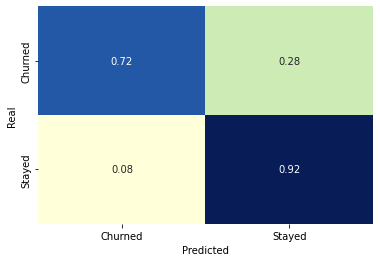

In [ ]:
conf_matrix = pd.crosstab(y_test,y_pred,rownames=['Real'],colnames=['Predicted'],normalize='index')
sns.heatmap(conf_matrix,fmt='.2f',annot=True,cmap="YlGnBu", cbar=False)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


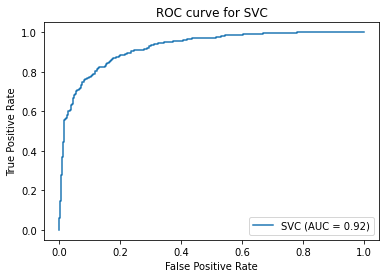

In [ ]:
#plotting the ROC curve
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection
metrics.plot_roc_curve(clf, X_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for SVC')
plt.show()

Random Forest

In [ ]:
rf_df = eng_telecom_data()

In [ ]:
#Data Set splitting
X = rf_df.drop('Customer Status',axis=1)
y = rf_df['Customer Status']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=140) 

In [ ]:
#--- Label encoding the Ordinal Internet Type Variable ---
ordinal_enco = OrdinalEncoder()
X_train[['Internet Type','AgeRange']] = ordinal_enco.fit_transform(X_train[['Internet Type','AgeRange']])
X_test[['Internet Type','AgeRange']] = ordinal_enco.transform(X_test[['Internet Type','AgeRange']])

In [ ]:
#Encoding nominal features --- RF
oh_col = X.select_dtypes('object').drop(['Internet Type','AgeRange'],axis=1).columns #object columns to be one hot encoded 

encoder_onehot = OneHotEncoder(sparse=False)
OH_encoded_train_features = encoder_onehot.fit_transform(X_train[oh_col])
OH_encoded_X_train = pd.DataFrame(data=OH_encoded_train_features,index=X_train[oh_col].index,
                                  columns=encoder_onehot.get_feature_names(X_train[oh_col].columns))

OH_encoded_test_features = encoder_onehot.transform(X_test[oh_col])
OH_encoded_X_test = pd.DataFrame(data=OH_encoded_test_features,index=X_test[oh_col].index,
                                 columns=encoder_onehot.get_feature_names(X_test[oh_col].columns))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train = pd.concat([X_train,OH_encoded_X_train],axis=1)
X_train = X_train.drop(X_train[oh_col],axis=1)
X_test = pd.concat([X_test,OH_encoded_X_test],axis=1)
X_test = X_test.drop(X_test[oh_col],axis=1)

In [ ]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Churned       0.83      0.66      0.74       368
      Stayed       0.88      0.95      0.91       927

    accuracy                           0.87      1295
   macro avg       0.85      0.80      0.82      1295
weighted avg       0.86      0.87      0.86      1295



In [ ]:
f1_churned['Rf'] = f1_score(y_test,y_pred,average=None).round(2)[0]
f1_stayed['Rf'] = f1_score(y_test,y_pred,average=None).round(2)[1]

precision_churned['Rf'] = precision_score(y_test,y_pred,average=None).round(2)[0]
precision_stayed['Rf'] = precision_score(y_test,y_pred,average=None).round(2)[1]

recall_churned['Rf'] = recall_score(y_test,y_pred,average=None).round(2)[0]
recall_stayed['Rf'] = recall_score(y_test,y_pred,average=None).round(2)[1]


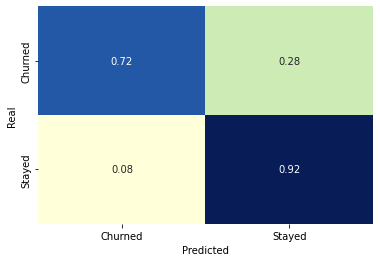

In [ ]:
conf_matrix = pd.crosstab(y_test,y_pred,rownames=['Real'],colnames=['Predicted'],normalize='index')
sns.heatmap(conf_matrix,fmt='.2f',annot=True,cmap="YlGnBu", cbar=False)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


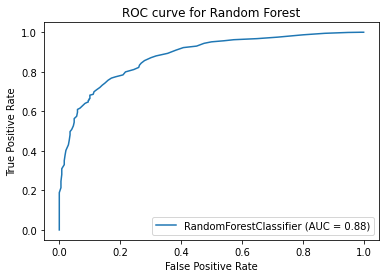

In [ ]:
#plotting the ROC curve
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection
metrics.plot_roc_curve(rf, X_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest')
plt.show()

Gradient Boost

In [ ]:
gb_df = eng_telecom_data()

In [ ]:
# --- Data Set splitting ---
X = gb_df.drop('Customer Status',axis=1)
y = gb_df['Customer Status']
 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=110) 

In [ ]:
#--- Standardizing numeric columns --- GB
number_columns = X_train.select_dtypes('number').columns
std_scaler = StandardScaler()
X_train[number_columns] = std_scaler.fit_transform(X_train[number_columns])
X_test[number_columns] = std_scaler.transform(X_test[number_columns])

In [ ]:
#--- Label encoding the Ordinal Internet Type Variable ---
ordinal_enco = OrdinalEncoder()
X_train[['Internet Type','AgeRange']] = ordinal_enco.fit_transform(X_train[['Internet Type','AgeRange']])
X_test[['Internet Type','AgeRange']] = ordinal_enco.transform(X_test[['Internet Type','AgeRange']])

In [ ]:
#Encoding nominal features --- 
oh_col = X.select_dtypes('object').drop(['Internet Type','AgeRange'],axis=1).columns #object columns to be one hot encoded 

encoder_onehot = OneHotEncoder(sparse=False)
OH_encoded_train_features = encoder_onehot.fit_transform(X_train[oh_col])
OH_encoded_X_train = pd.DataFrame(data=OH_encoded_train_features,index=X_train[oh_col].index,
                                  columns=encoder_onehot.get_feature_names(X_train[oh_col].columns))

OH_encoded_test_features = encoder_onehot.transform(X_test[oh_col])
OH_encoded_X_test = pd.DataFrame(data=OH_encoded_test_features,index=X_test[oh_col].index,
                                 columns=encoder_onehot.get_feature_names(X_test[oh_col].columns))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train = pd.concat([X_train,OH_encoded_X_train],axis=1)
X_train = X_train.drop(X_train[oh_col],axis=1)
X_test = pd.concat([X_test,OH_encoded_X_test],axis=1)
X_test = X_test.drop(X_test[oh_col],axis=1)

In [ ]:
xg = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400,max_depth=13)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Churned       0.77      0.69      0.73       368
      Stayed       0.88      0.92      0.90       927

    accuracy                           0.85      1295
   macro avg       0.83      0.81      0.82      1295
weighted avg       0.85      0.85      0.85      1295



In [ ]:
f1_churned['GB'] = f1_score(y_test,y_pred,average=None).round(2)[0]
f1_stayed['GB'] = f1_score(y_test,y_pred,average=None).round(2)[1]

precision_churned['GB'] = precision_score(y_test,y_pred,average=None).round(2)[0]
precision_stayed['GB'] = precision_score(y_test,y_pred,average=None).round(2)[1]

recall_churned['GB'] = recall_score(y_test,y_pred,average=None).round(2)[0]
recall_stayed['GB'] = recall_score(y_test,y_pred,average=None).round(2)[1]

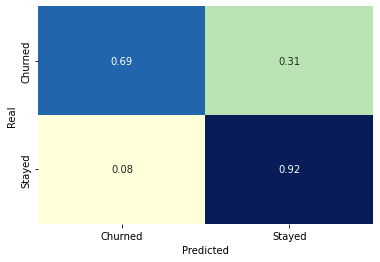

In [ ]:
conf_matrix = pd.crosstab(y_test,y_pred,rownames=['Real'],colnames=['Predicted'],normalize='index')
sns.heatmap(conf_matrix,fmt='.2f',annot=True,cmap="YlGnBu", cbar=False)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


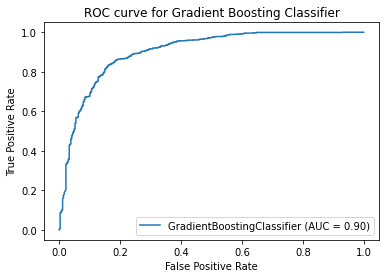

In [ ]:
#plotting the ROC curve
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection
metrics.plot_roc_curve(xg, X_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Gradient Boosting Classifier')
plt.show()

Performance Evaluation:

In [ ]:
f1 = pd.DataFrame.from_dict({'churned':f1_churned,'stayed':f1_stayed})
precision = pd.DataFrame.from_dict({'churned':precision_churned,'stayed':precision_stayed})
recall = pd.DataFrame.from_dict({'churned':recall_churned,'stayed':recall_stayed})

In [ ]:

import pandas as pd

summary_data2 = [{'F1 Score': f1_churned['LogReg'], 'Precision': precision_churned['LogReg'], 'Recall': recall_churned['LogReg']},
                 {'F1 Score': f1_churned['SVC'], 'Precision': precision_churned['SVC'], 'Recall': recall_churned['SVC']},
                 {'F1 Score': f1_churned['Rf'], 'Precision': precision_churned['Rf'], 'Recall': recall_churned['Rf']},
                 {'F1 Score': f1_churned['GB'], 'Precision': precision_churned['GB'], 'Recall': recall_churned['GB']}]
summarydf2_new = pd.DataFrame(summary_data2,index=['Logistic Regression','SVC','Random Forest', 'XG Boost' ])
summarydf2_new

,F1 Score,Precision,Recall
Logistic Regression,0.77,0.77,0.78
SVC,0.75,0.77,0.72
Random Forest,0.75,0.77,0.72
XG Boost,0.73,0.77,0.69


In [ ]:
print('Maximum scores table')
pd.concat([f1.idxmax().rename('model'),f1.max().rename('f1'),
           precision.idxmax().rename('model'),precision.max().rename('precision'),
           recall.idxmax().rename('model'),recall.max().rename('recall')],axis=1)

Maximum scores table


,model,f1,model,precision,model,recall
churned,LogReg,0.77,LogReg,0.77,LogReg,0.78
stayed,LogReg,0.91,LogReg,0.91,SVC,0.92


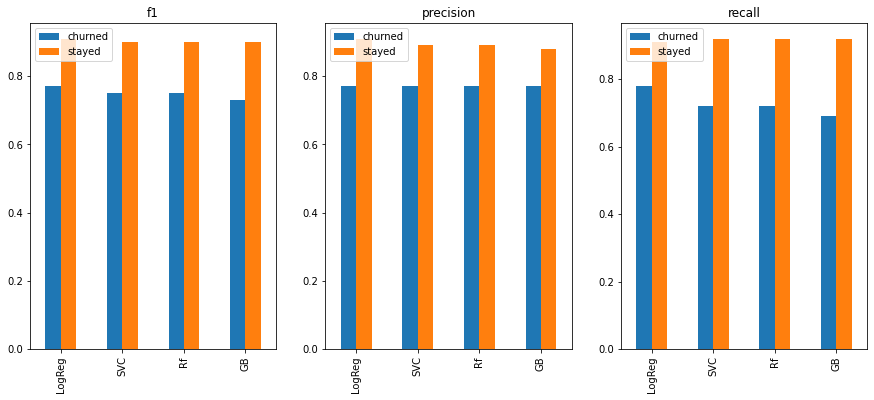

In [ ]:


fig,axes = plt.subplots(1,3,figsize=(15,6))

#f1 plot
axes.flat[0].set_title('f1')
f1.plot.bar(ax=axes.flat[0]);
#precision plot
axes.flat[1].set_title('precision')
precision.plot.bar(ax=axes.flat[1]);
#recall plot
axes.flat[2].set_title('recall')
recall.plot.bar(ax=axes.flat[2]);

